In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import os

from seq_utils import letters_to_nums, sequences_from_fasta, one_hot_seq_batch
from PCA_func import plot_projected_pca, plot_pca_of_sequences, plot_two_pca_side_by_side, plot_projected_pca_mult


Processing file: gen_seqs_randinit_Ns15000_b0.01_b_PCA_1_PCA_comp_24_20PCA_comp.npy


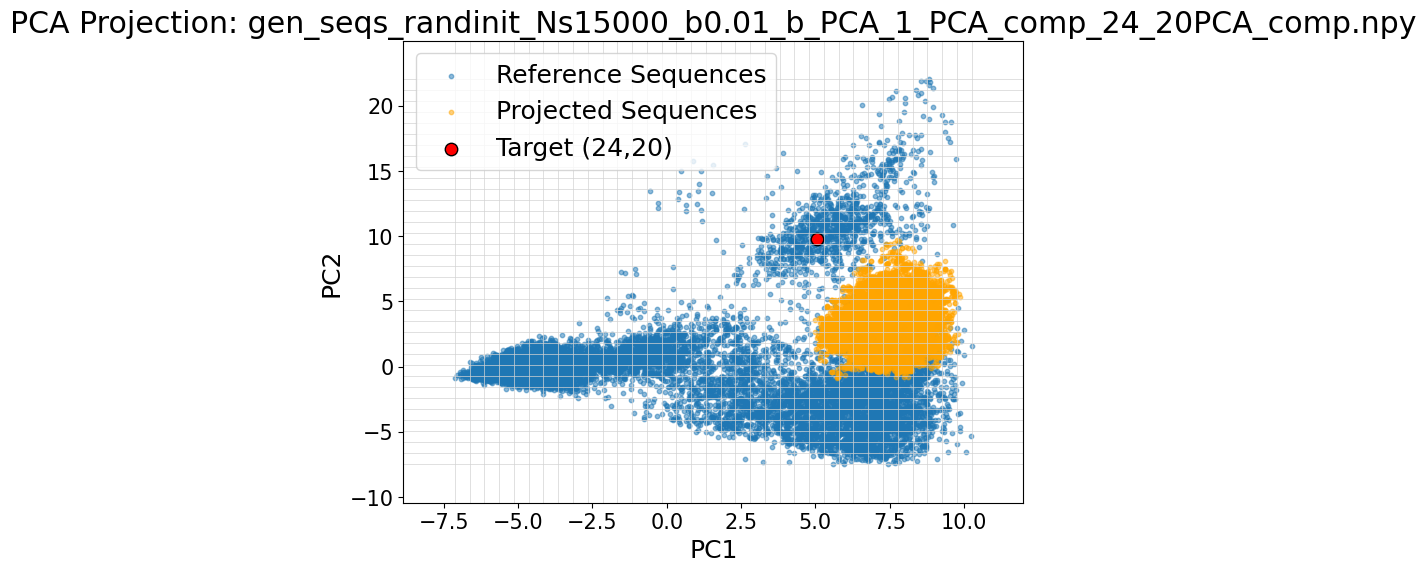


Processing file: gen_seqs_randinit_Ns15000_b0.1_b_PCA_1_PCA_comp_24_20PCA_comp.npy


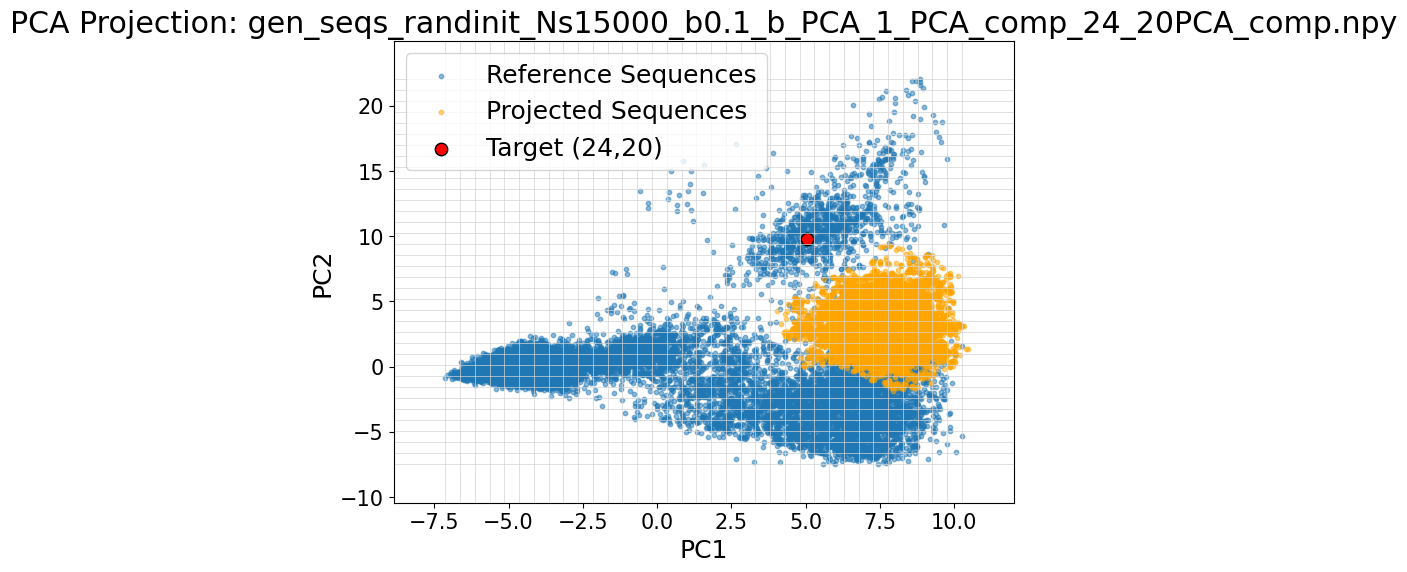


Processing file: gen_seqs_randinit_Ns15000_b0.5_b_PCA_1_PCA_comp_24_20PCA_comp.npy


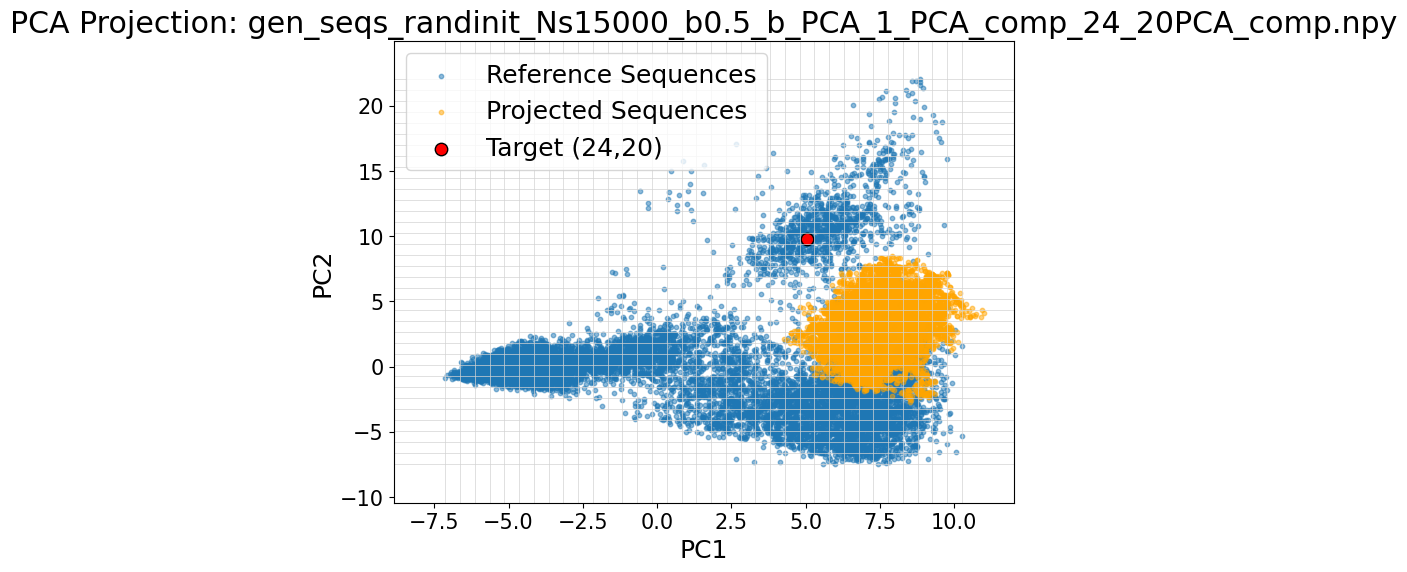


Processing file: gen_seqs_randinit_Ns15000_b10_b_PCA_1_PCA_comp_24_20PCA_comp.npy


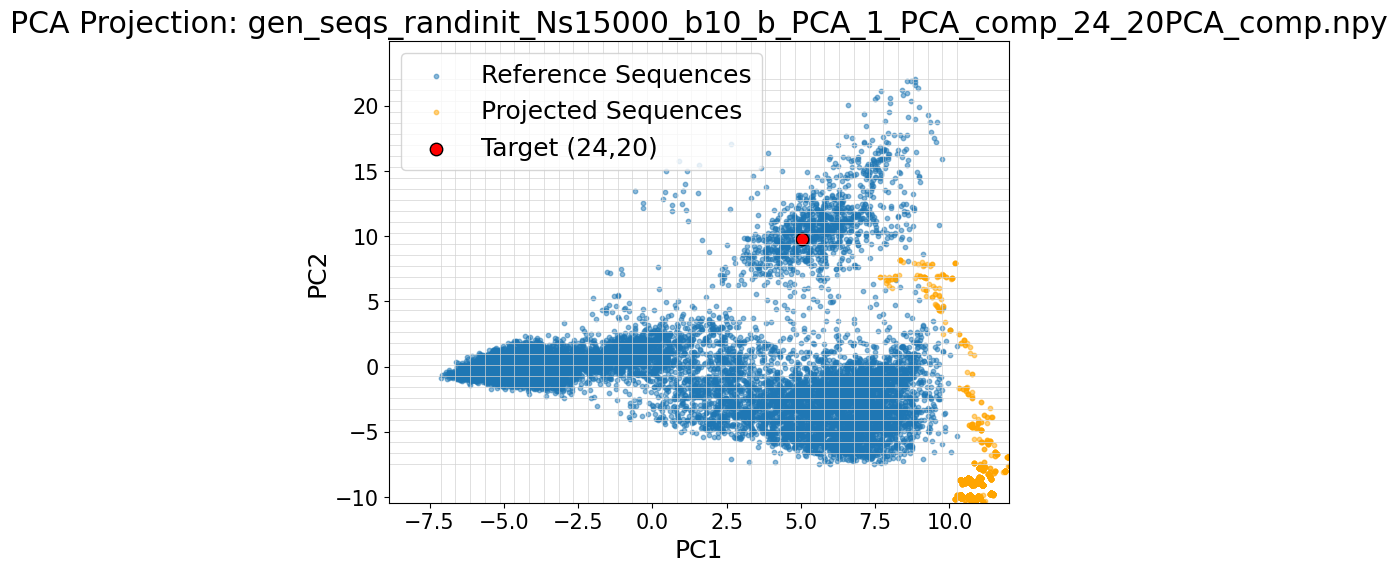


Processing file: gen_seqs_randinit_Ns15000_b1_b_PCA_1_PCA_comp_24_20PCA_comp.npy


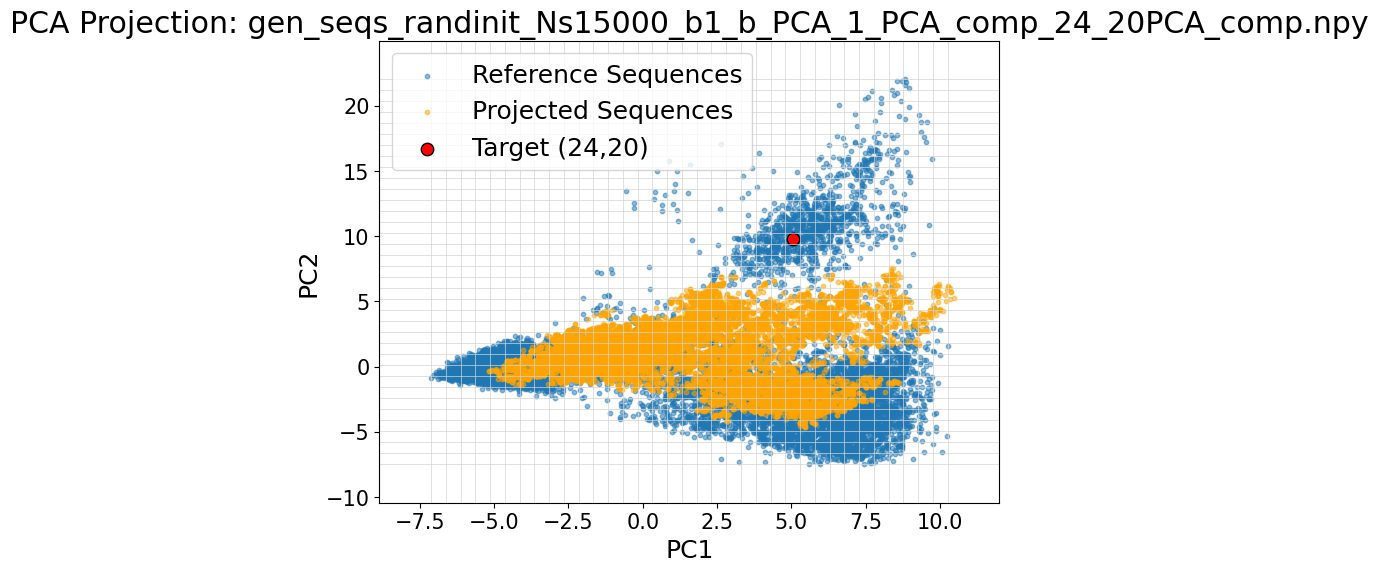


Processing file: gen_seqs_randinit_Ns15000_b2_b_PCA_1_PCA_comp_24_20PCA_comp.npy


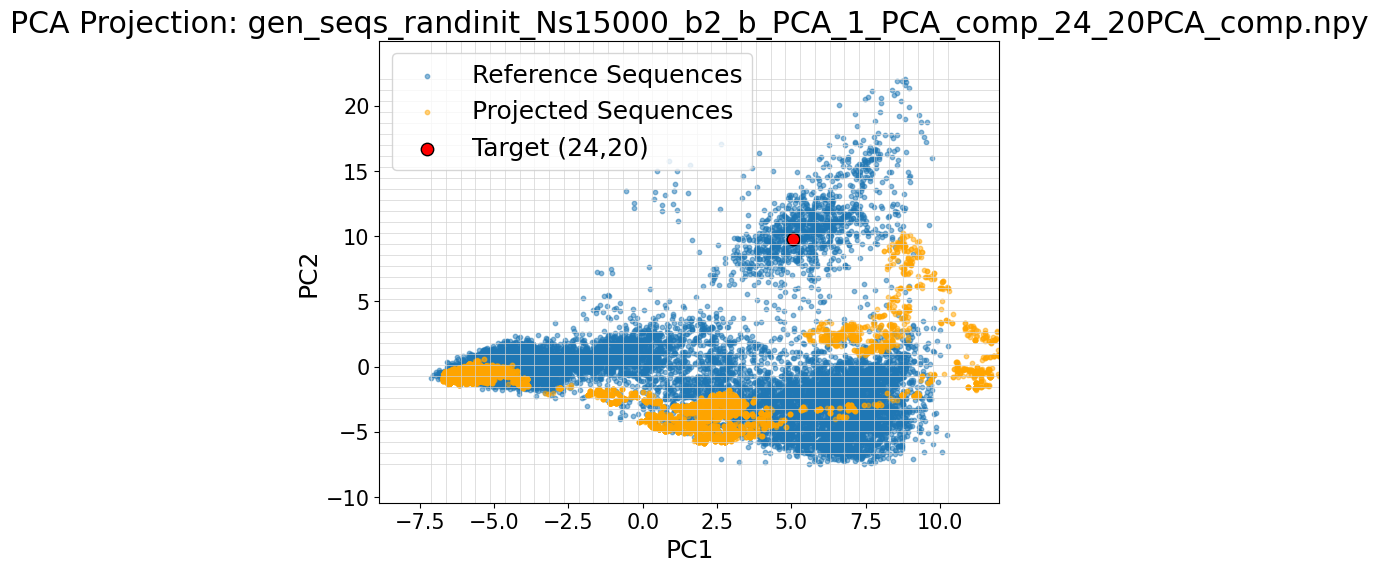


Processing file: gen_seqs_randinit_Ns15000_b4_b_PCA_1_PCA_comp_24_20PCA_comp.npy


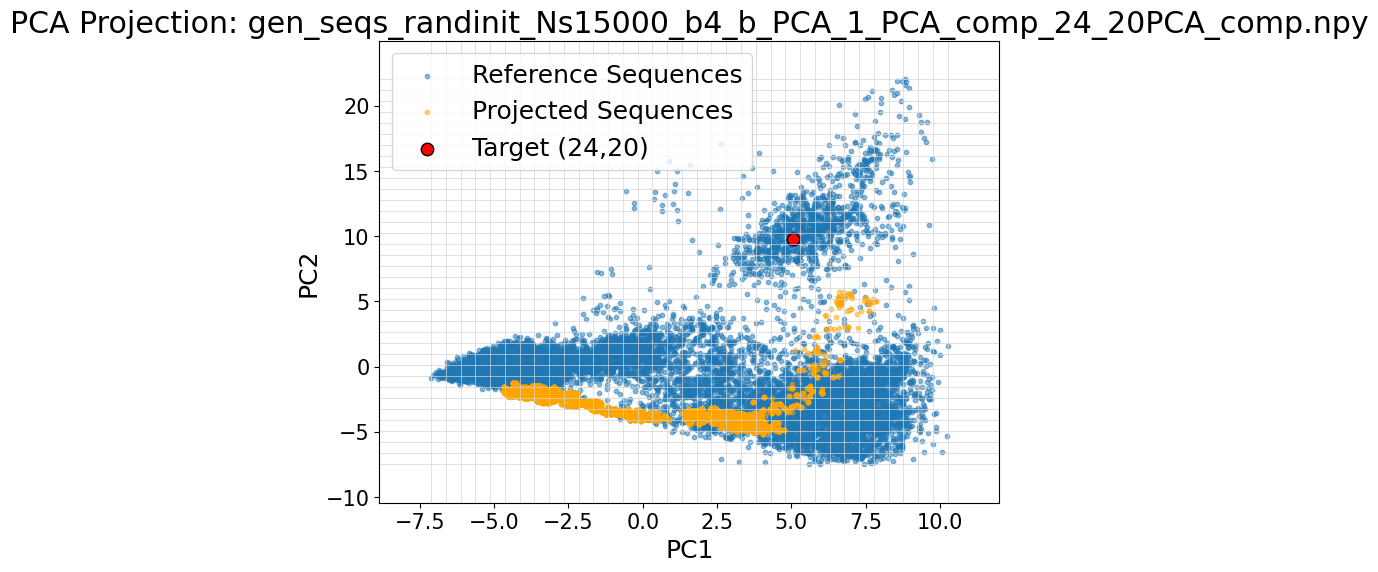


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA0.01_PCA_comp_24_20PCA_comp.npy


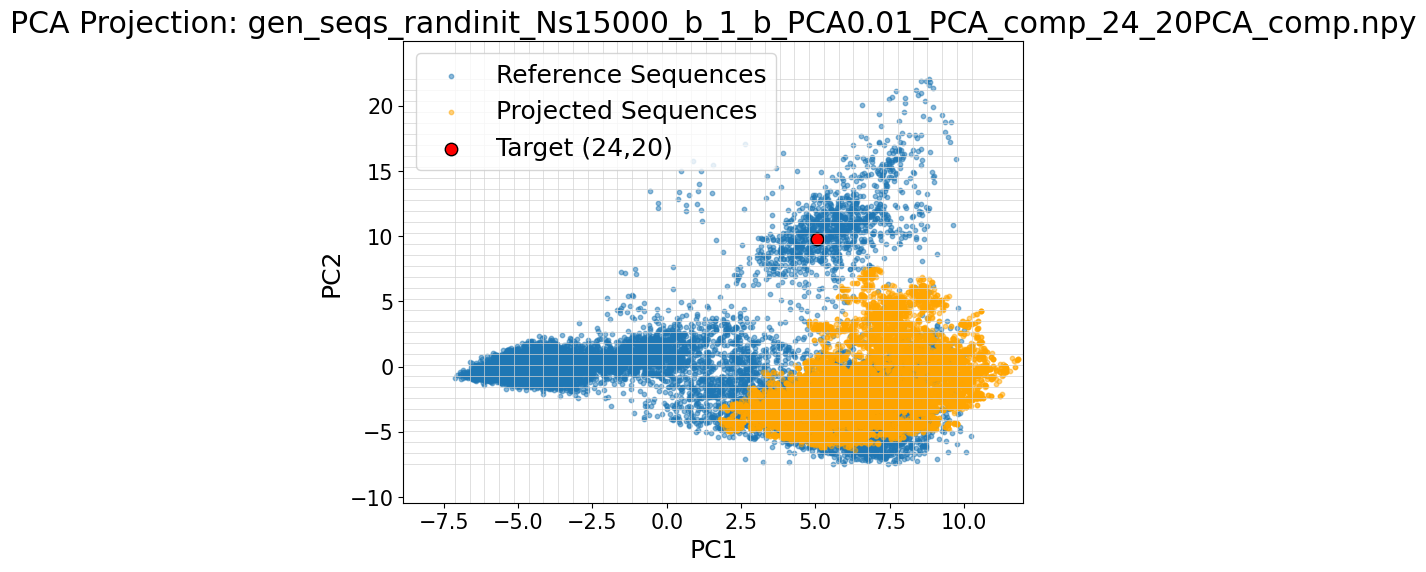


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA0.1_PCA_comp_24_20PCA_comp.npy


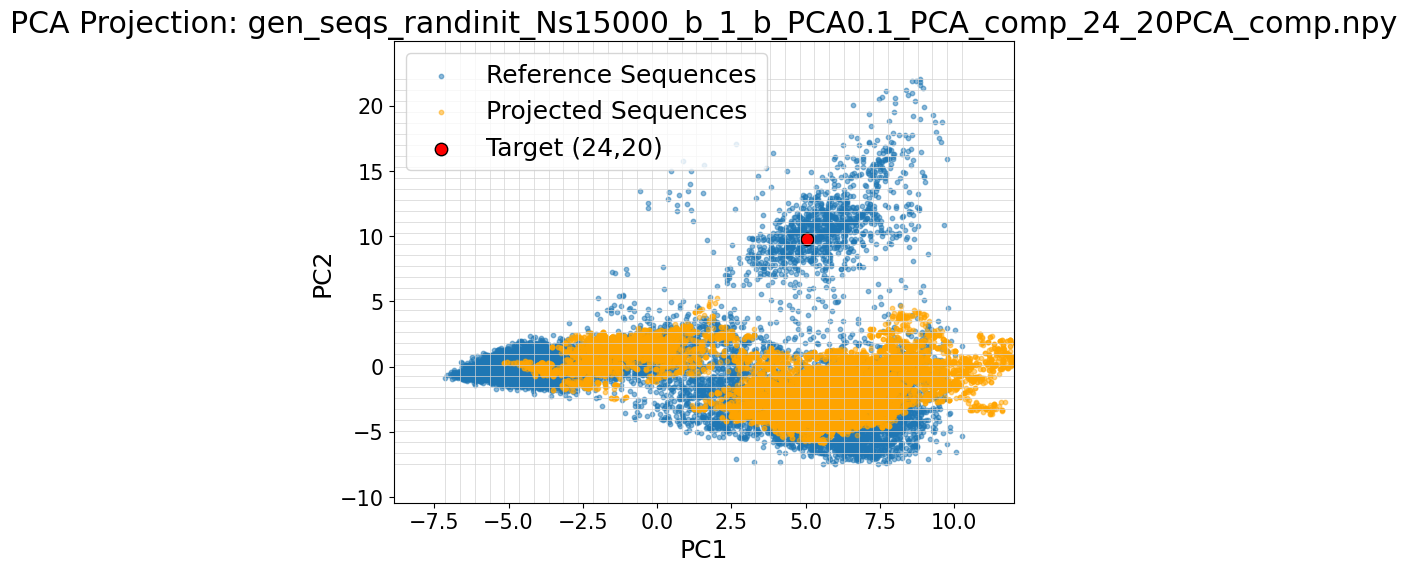


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA0.5_PCA_comp_24_20PCA_comp.npy


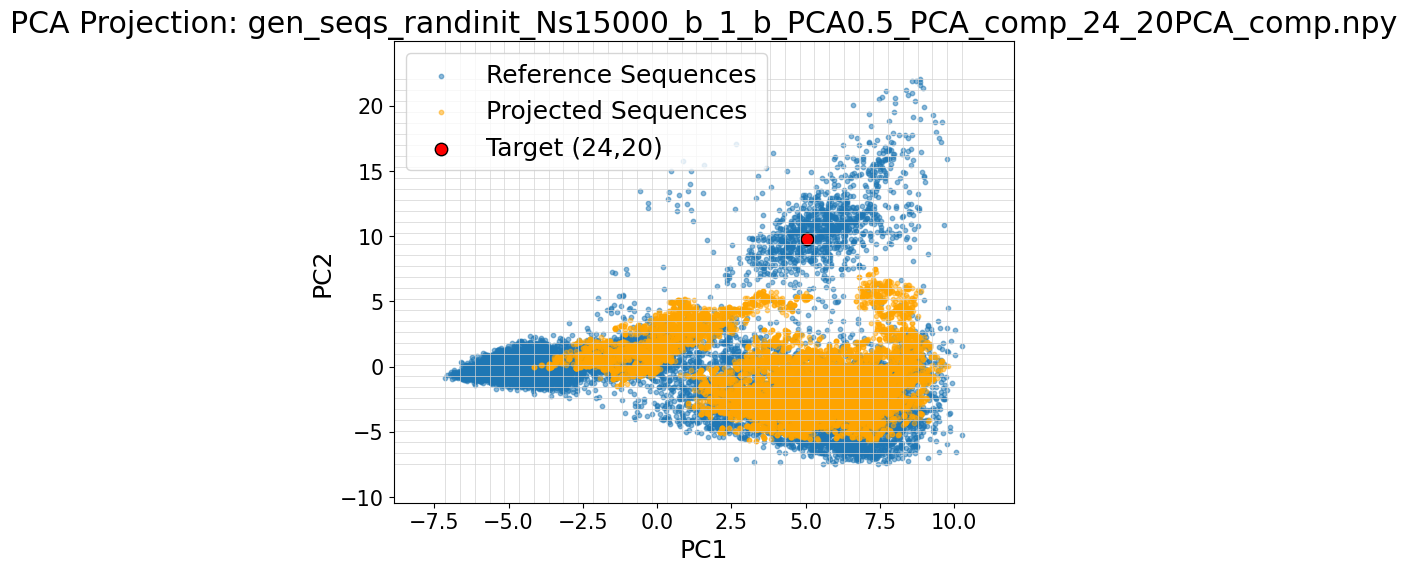


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA10_PCA_comp_24_20PCA_comp.npy


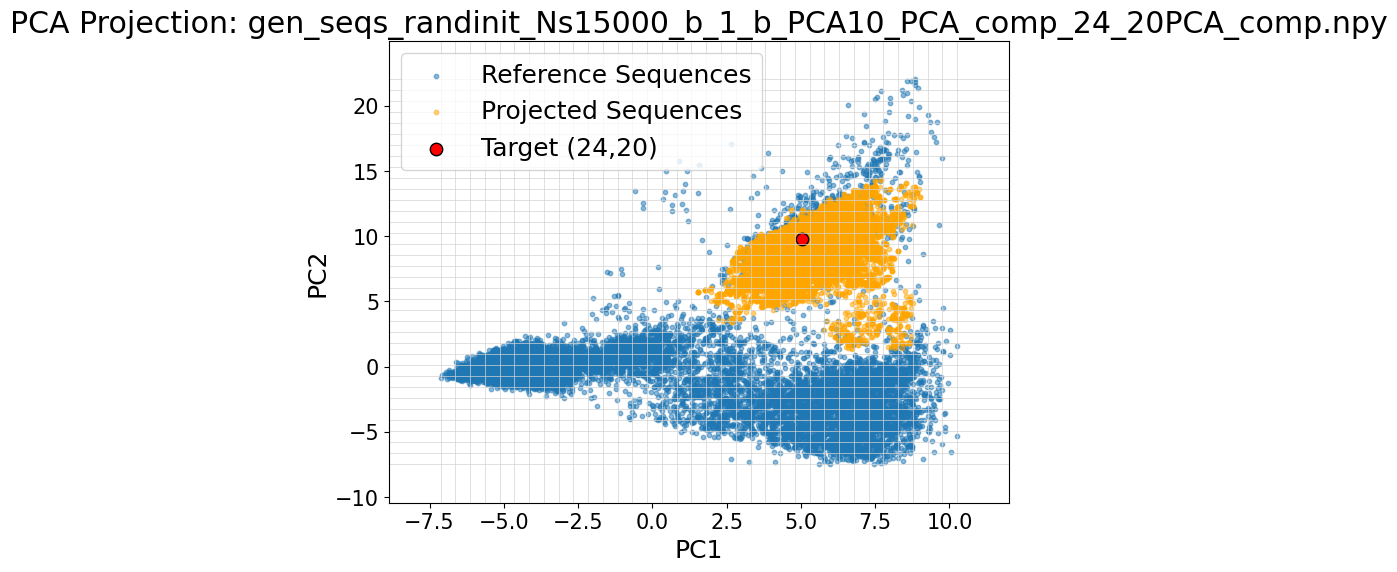


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA2_PCA_comp_24_20PCA_comp.npy


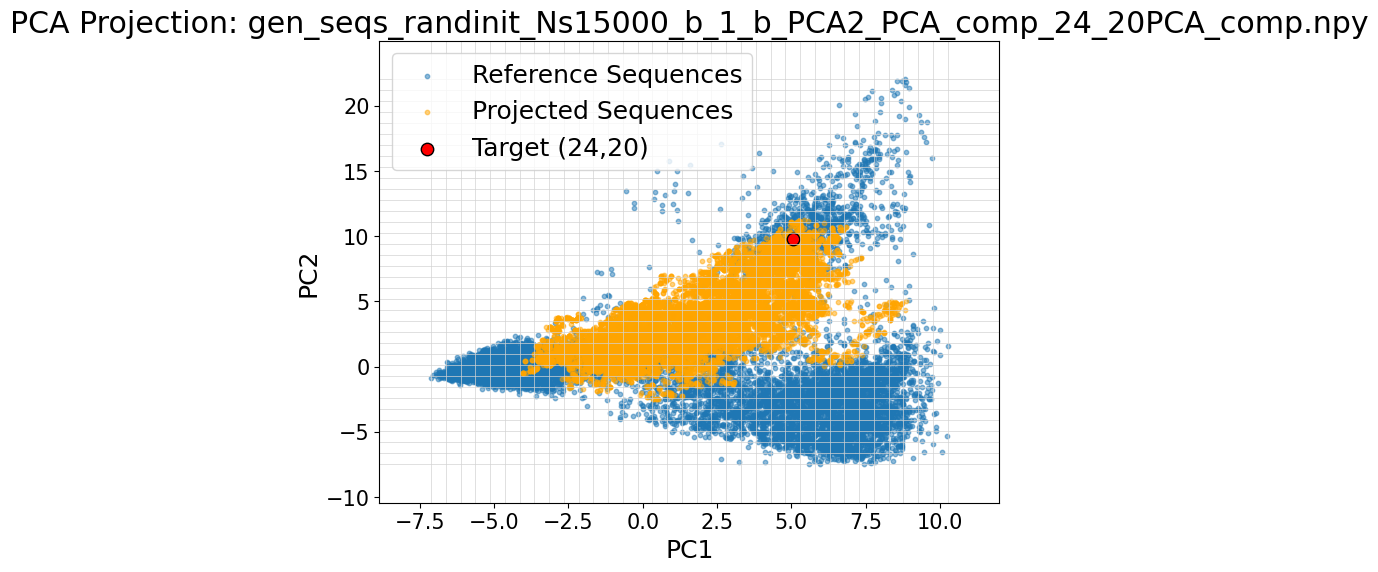


Processing file: gen_seqs_randinit_Ns15000_b_1_b_PCA4_PCA_comp_24_20PCA_comp.npy


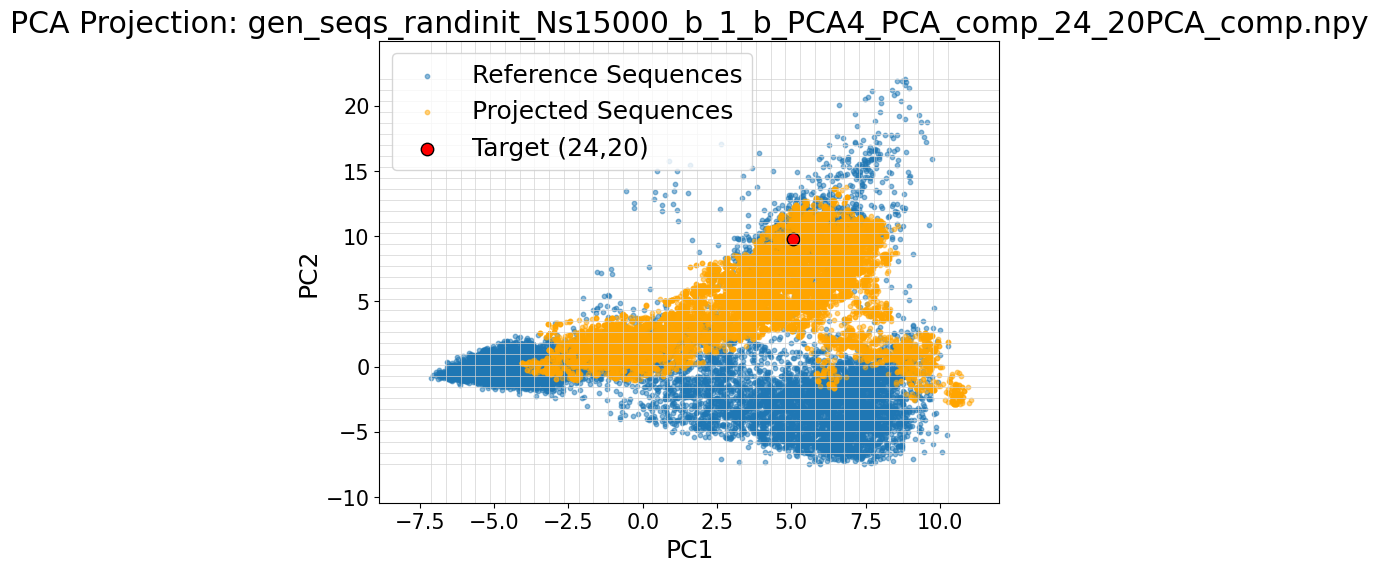


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b0.01PCA_comp.npy


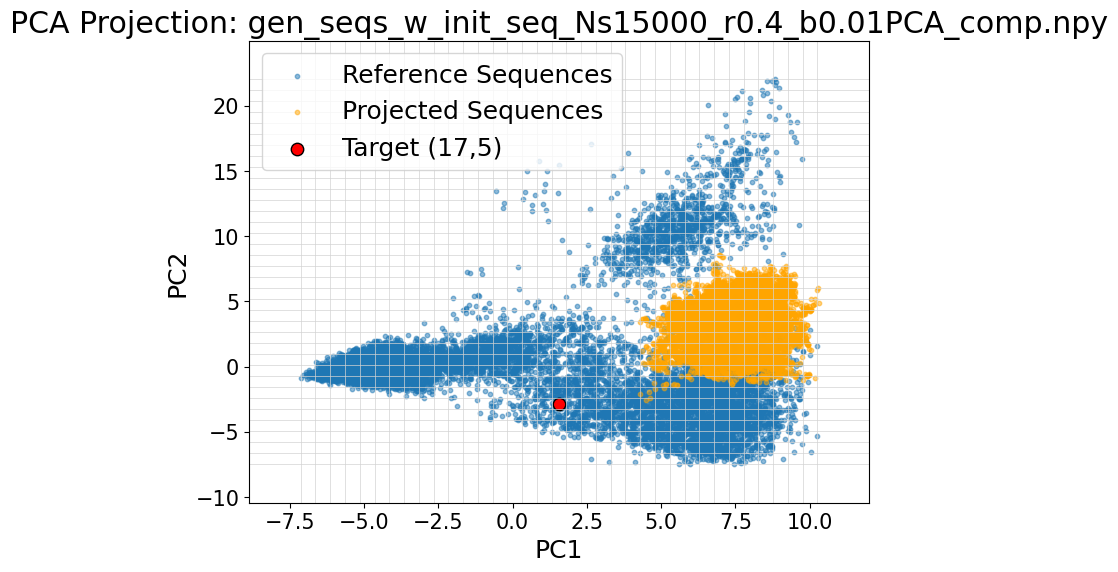


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b0.1PCA_comp.npy


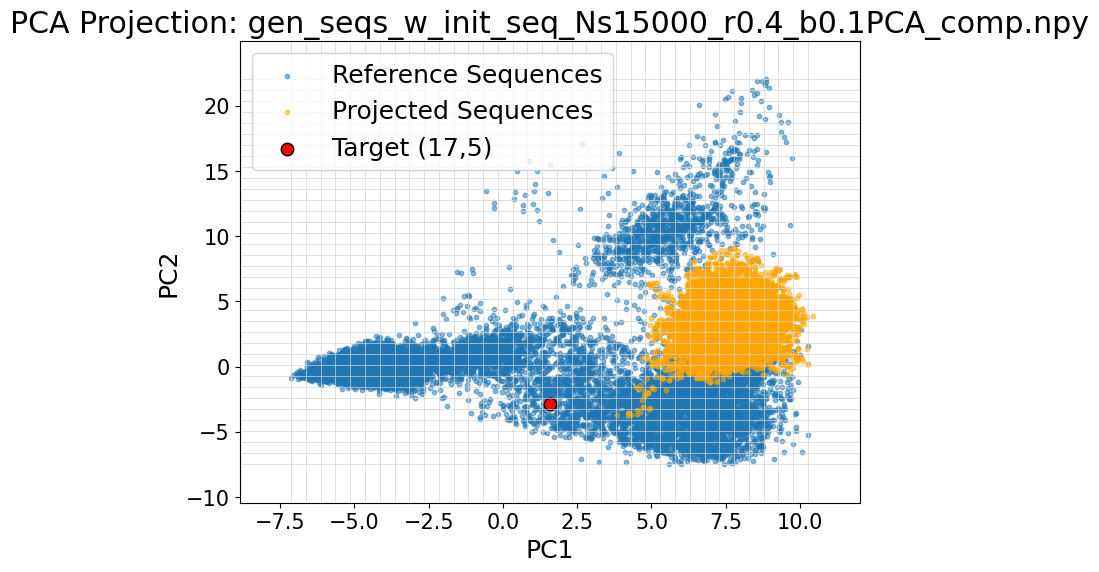


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b0.5PCA_comp.npy


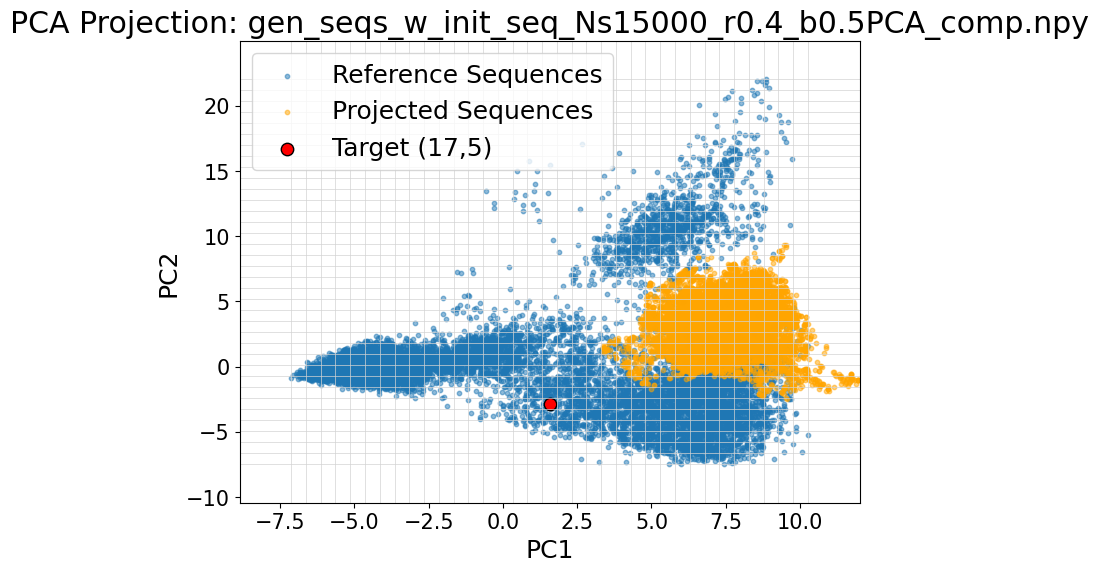


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b10PCA_comp.npy


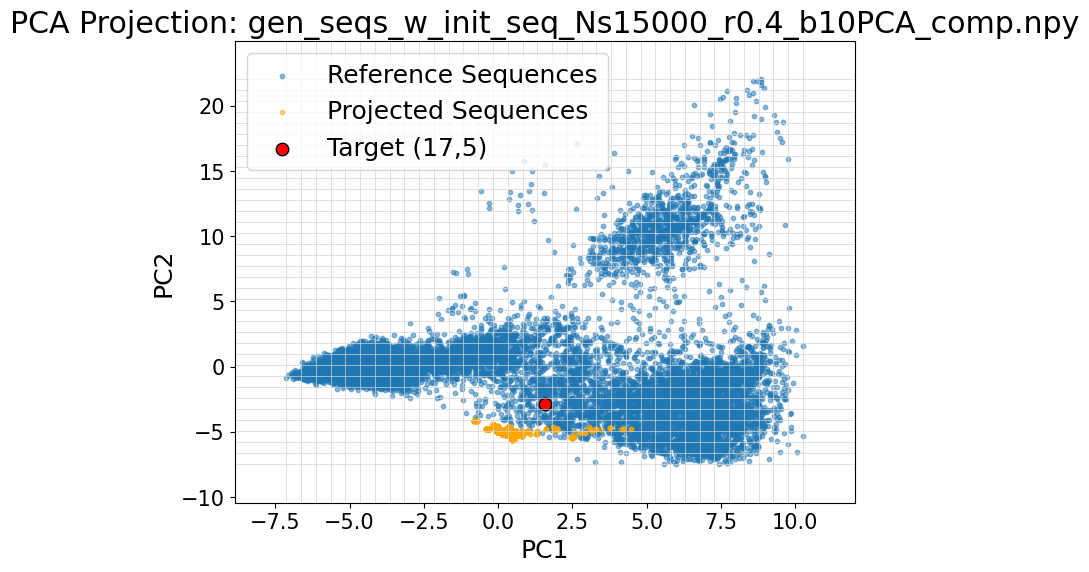


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b1PCA_comp.npy


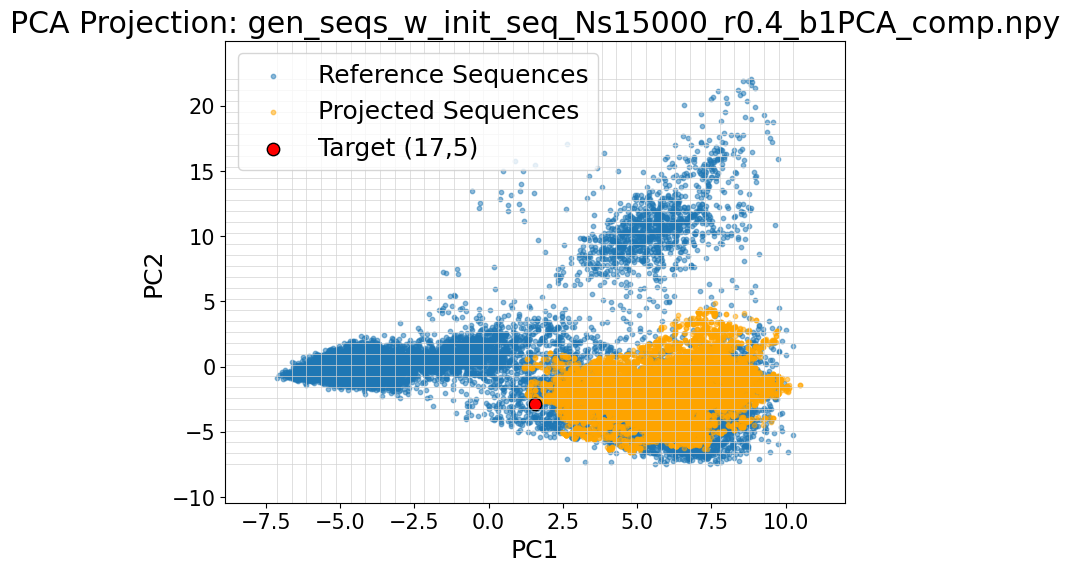


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b2PCA_comp.npy


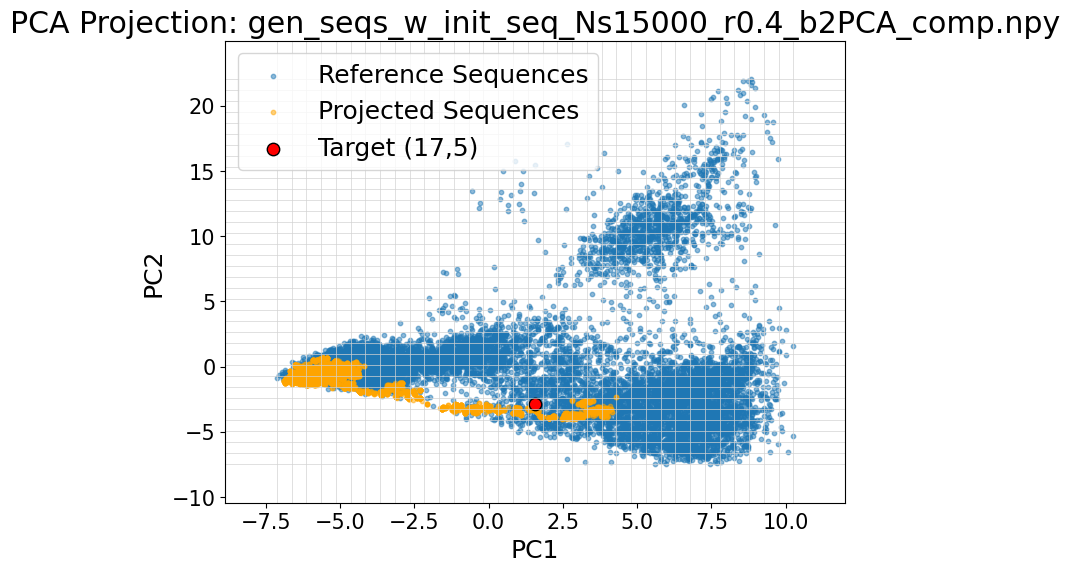


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b4PCA_comp.npy


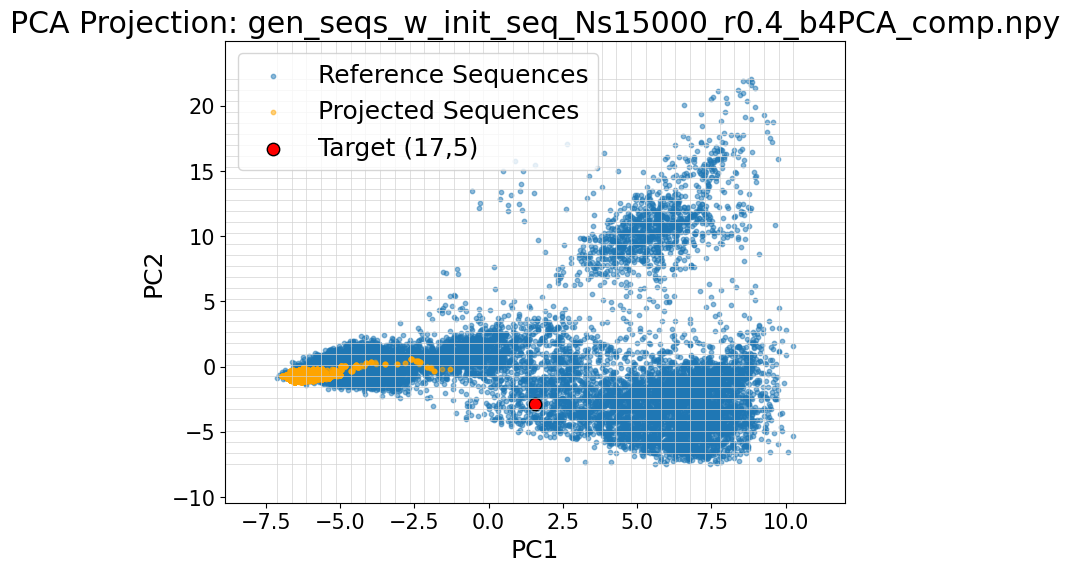


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b_1_b_PCA0.01PCA_comp.npy


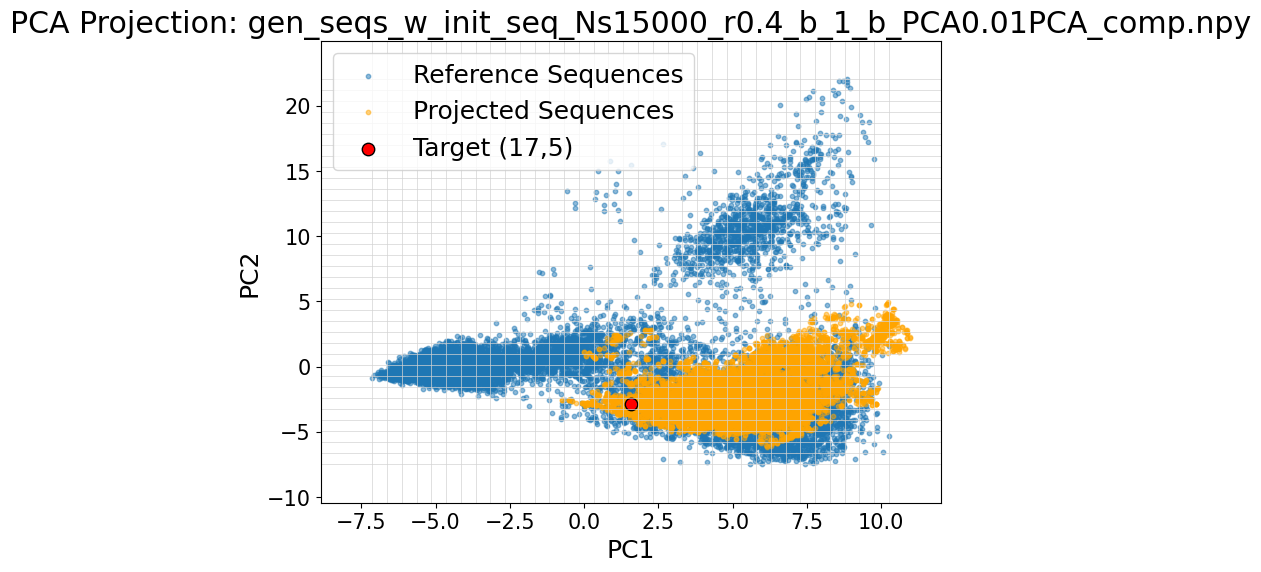


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b_1_b_PCA0.1PCA_comp.npy


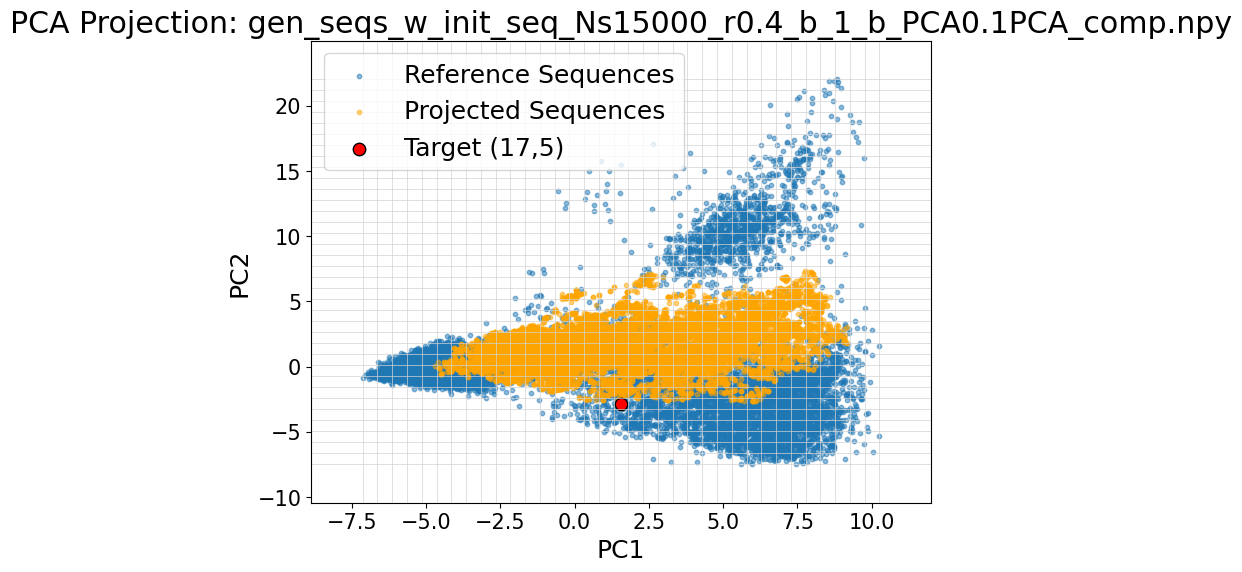


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b_1_b_PCA0.5PCA_comp.npy


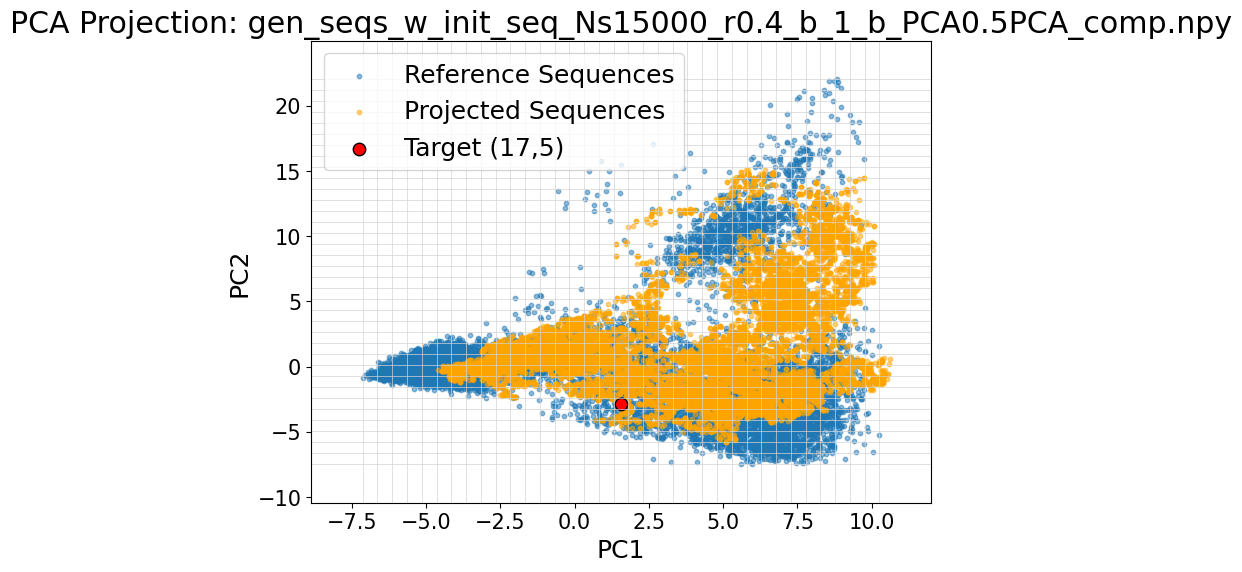


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b_1_b_PCA10PCA_comp.npy


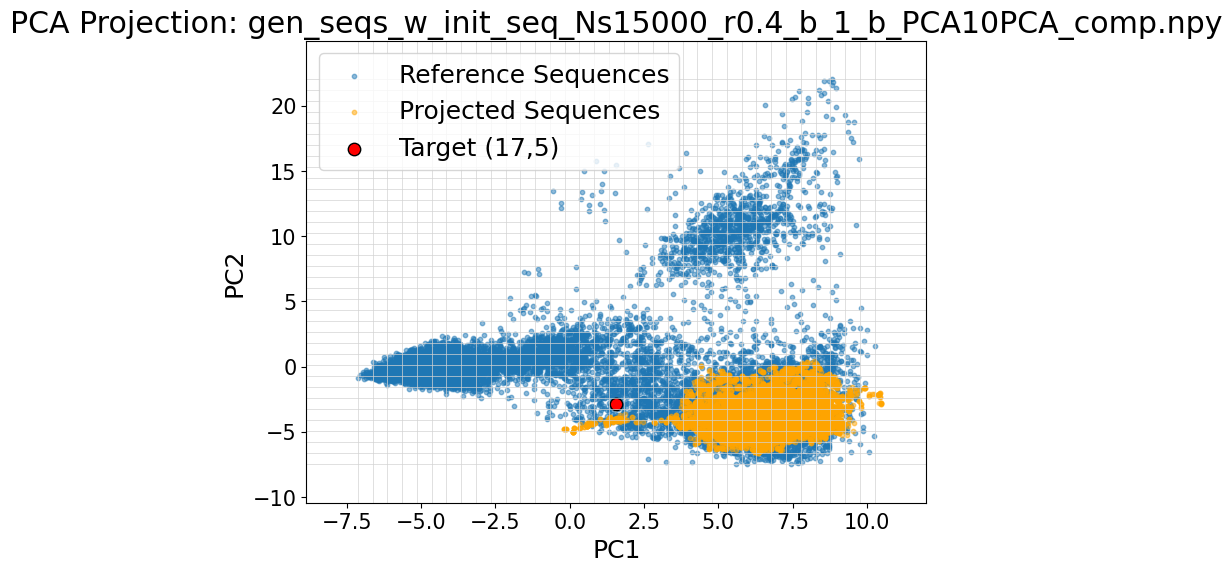


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b_1_b_PCA2PCA_comp.npy


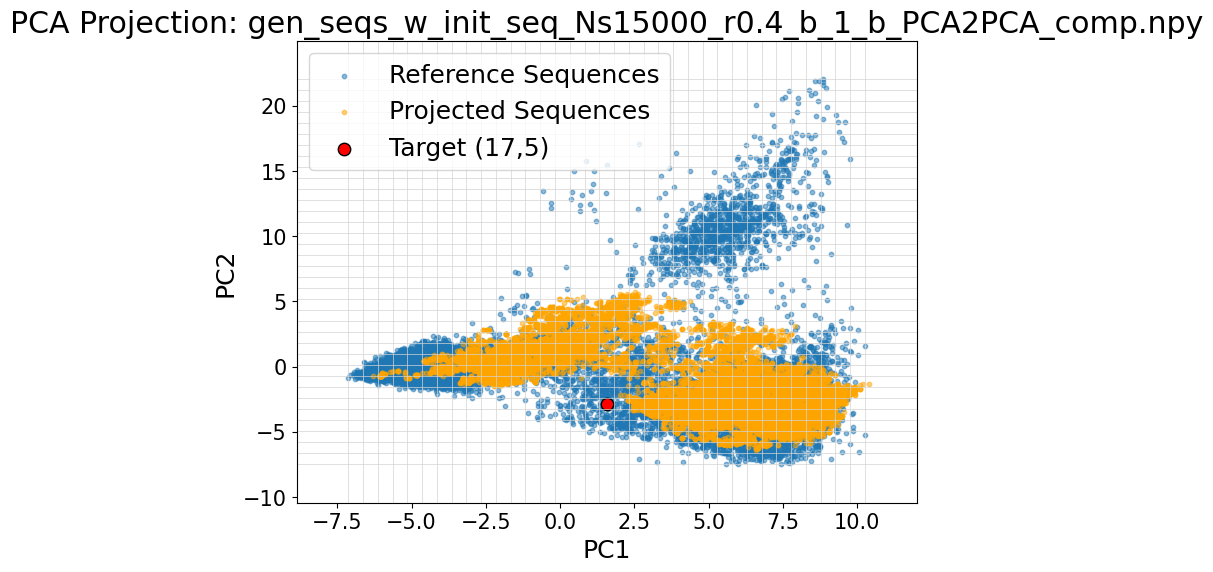


Processing file: gen_seqs_w_init_seq_Ns15000_r0.4_b_1_b_PCA4PCA_comp.npy


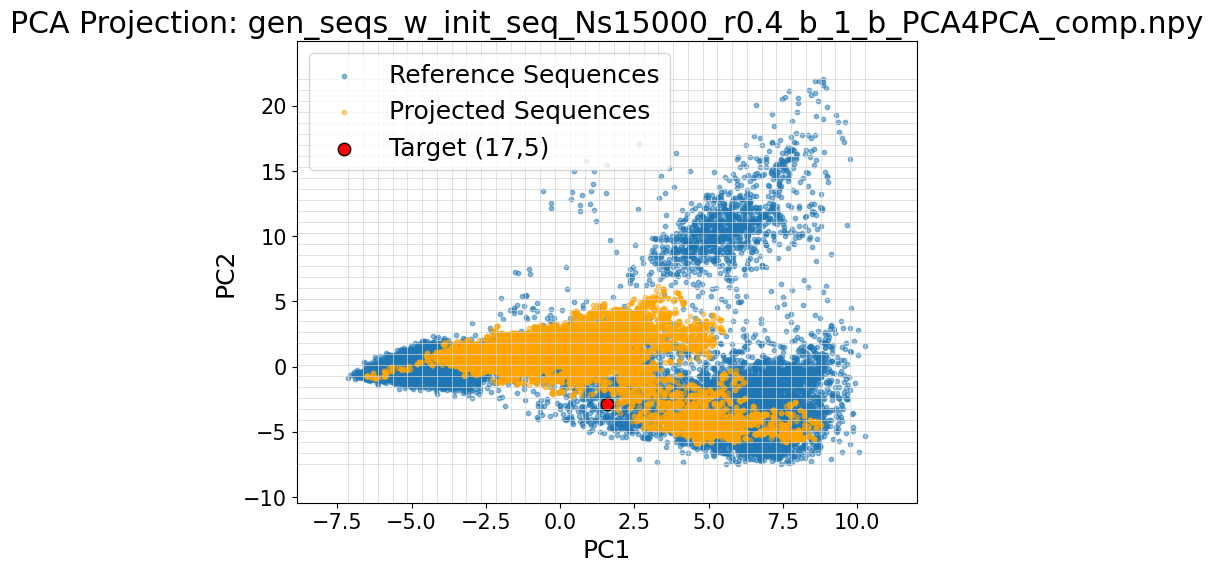

In [2]:
# ----- Paths -----
generated_dir = 'generated_sequences_brute_forcePCA_comp'
cwd = os.getcwd()
full_gen_path = os.path.join(cwd, generated_dir)

# ----- Load train sequences -----
family = 'jdoms_bacteria_train2'
file_test_data=r"C:\Users\youss\OneDrive\Bureau\master epfl\MA2\TP4 De los Rios\git_test\PLM-gen-DCA\Attention-DCA-main\CODE\DataAttentionDCA\jdoms\jdoms_bacteria_train2.fasta"

train_sequences = sequences_from_fasta(file_test_data)
train_sequences_num = [letters_to_nums(seq) for seq in train_sequences]

# ----- Loop through all .npy files in directory -----
for file in os.listdir(full_gen_path):
    if file.endswith('.npy'):
        print(f"\nProcessing file: {file}")
        
        # Load generated sequences
        file_path = os.path.join(full_gen_path, file)
        gen_sequences = np.load(file_path)
        L=63
        if gen_sequences.shape[1] > L:
            target_coords = gen_sequences[0, -2:]  # Last two columns are PCA coords
            gen_sequences = gen_sequences[:, :-2]  # Remove last 2 cols if they are PCA coords
        else:
            target_coords = None
        # Optional: slice if needed
        # gen_sequences = gen_sequences[Ni:Nf]  # Uncomment if you want to subset

        # Extract target PCA coordinates from filename
        #match = re.findall(r'\d+\.\d+|\d+', file)  # Captures floats or ints
        #if len(match) >= 2:
        #    target_coords = np.array([float(match[-2]), float(match[-1])])
        #else:
        #    print("Warning: Could not extract PCA coords from filename.")
        #    target_coords = None
#
        # Plot PCA projection
        title = f"PCA Projection: {file}"
        plot_projected_pca(
            sequences_reference=train_sequences,
            sequences_to_project=gen_sequences,
            title=title,
            Nbins=35,
            target_coords=target_coords)